In [3]:

#Run this cell to install the required packages for Copilot
%pip install https://aka.ms/chat_magics-0.0.0-py3-none-any.whl
%load_ext chat_magics


StatementMeta(, , , Waiting, , Waiting)

  Using cached https://aka.ms/chat_magics-0.0.0-py3-none-any.whl (14 kB)
  Using cached https://aka.ms/ds_copilot-0.0.0-py3-none-any.whl (51 kB)


  Using cached https://aka.ms/chat_magics_fabric-0.0.0-py3-none-any.whl (126 kB)



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### **Chat_magic commands**

* Using installed DSCopilot package.
* Service: fabric
* Model: gpt-35-turbo-0125




#### **AI Processor Disclaimer**


#### Data Privacy and Security

Chat-magics is powered by Azure OpenAI Service and is subject to the supplemental terms of use for
[Microsoft Azure Previews](https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/).
Azure OpenAI is fully controlled by Microsoft.

In order to generate a response, chat-magics uses (a) your prompt or input and, when appropriate,
(b) additional data that is retrieved through the grounding process to provide more relevant,
contextual responses. This information is sent to Azure OpenAI, where it is processed and an
output is generated. Therefore, data processed by Azure OpenAI can include:

- Your prompt or input
- Grounding data
- Chat-magics response or output

Your Data:

- Is not used to train models.
- Is not available to other customers.
- Is not stored.





### **Usage**
Use the `%chat_magics` command to display this help message.

<details>
<summary>Expand for details...</summary>

To get started, try something like the following:

    %%code
    Load my_data.csv from the current folder into a pandas dataframe.

#### Main Commands
* `%%chat` - Ask questions about your notebook state or let the chat-magics help you understand or author it.
* `%%code` - Generate code to work with or visualize your data.
* `%describe` - Describe a loaded dataframe.
* `%%add_comments` - Add comments to the code in a cell.
* `%%fix_errors` - Fix errors in a cell.
* `%%translate` - Translate code from one language to another.

#### Configuration Commands
* `%set_output` - Set whether code responses are generated to the current cell, next cell, cell output, a variable, or not at all.
* `%set_language` - Set the default language for generated code.

#### Context Commands
* `%pin & %unpin` - Pin and unpin dataframes to better focus AI responses.
* `%new_task` - Provide overall guidance for generated responses. Clears history.
* `%ignore` - Ignore a cell so that it is not processed by chat-magics.

#### Detailed Usage
For detailed information on each command, use the `?` (help operator), e.g. `%%code?` or `%set_sharing_level?`. Also, note that some magic commands may not be available depending on the AI service you have configured.

</details>

In [3]:
# Welcome to your new notebook
# Type here in the cell editor to add code!
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.optimize import minimize
import random
import seaborn as sns

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 4, Finished, Available, Finished)

In [ ]:
df = spark.sql("SELECT * FROM lakehouse1.customerchurndata LIMIT 1000")
display(df)

In [4]:
churn = pd.read_csv("/lakehouse/default/Files/customerChurn.csv")

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 5, Finished, Available, Finished)

In [ ]:
spark_churn = spark.createDataFrame(churn)
spark_churn.write.format("delta").saveAsTable("CustomerChurnData")

In [ ]:
churn_df = spark.sql("SELECT * FROM lakehouse1.customerchurndata LIMIT 1000").toPandas()
display(churn_df)

In [ ]:
churn_df_woodgrove = churn_df[churn_df['organisation'] == 'barclays'].sort_values(by='date')
churn_df_woodgrove

In [10]:
churn_df_woodgrove.dropna(inplace=True)

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 11, Finished, Available, Finished)

In [12]:
num_rows = len(churn_df_woodgrove.index)
num_rows

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 13, Finished, Available, Finished)

96

In [13]:
def random_float(low, high):
    temp = random.random()*(high-low) + low
    return round(temp,2)

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 14, Finished, Available, Finished)

In [15]:
from scipy.optimize import minimize
from scipy.stats import pearsonr
import random

# Ensure that the number of elements in 'x' matches the length of '30DaysSentimentValue'
num_rows = len(churn_df_woodgrove['30DaysSentimentValue'])

# Define the initial guess for x as a list with the same length as '30DaysSentimentValue'
x0 = [random.uniform(15, 24) for _ in range(num_rows)]

# Define bounds for each element in x
bounds = [(15, 24) for _ in range(num_rows)]

# Define the objective function
def objective_function(x):
    return abs(-1 - pearsonr(churn_df_woodgrove['30DaysSentimentValue'], x)[0])

# Perform the minimization
result = minimize(objective_function, x0=x0, method='SLSQP', bounds=bounds)

# Assign the result to the 'churn' column
churn_df_woodgrove['churn'] = result.x
churn_df_woodgrove['churn']
churn_df_woodgrove

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 16, Finished, Available, Finished)

,date,30DaysSentimentValue,7DaysStockPrice,organisation,churn
779,2019-12-30T00:00:00.000+0000,-0.471887,93.835952,barclays,16.929262
780,2019-12-31T00:00:00.000+0000,-0.526512,93.900935,barclays,17.127196
781,2020-01-01T00:00:00.000+0000,-0.619951,93.965919,barclays,17.562439
782,2020-01-02T00:00:00.000+0000,-0.664610,94.615753,barclays,17.754485
783,2020-01-03T00:00:00.000+0000,-0.686662,94.810703,barclays,17.844913
...,...,...,...,...,...
870,2020-03-30T00:00:00.000+0000,-2.050066,57.152853,barclays,23.614417
871,2020-03-31T00:00:00.000+0000,-2.046264,56.730461,barclays,23.617331
872,2020-04-01T00:00:00.000+0000,-2.071231,55.528270,barclays,23.720385
873,2020-04-02T00:00:00.000+0000,-2.091832,54.358569,barclays,23.842124


StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 23, Finished, Available, Finished)

Text(0.5, 1.0, "Woodgrove's Churn rate over the past 1 month")

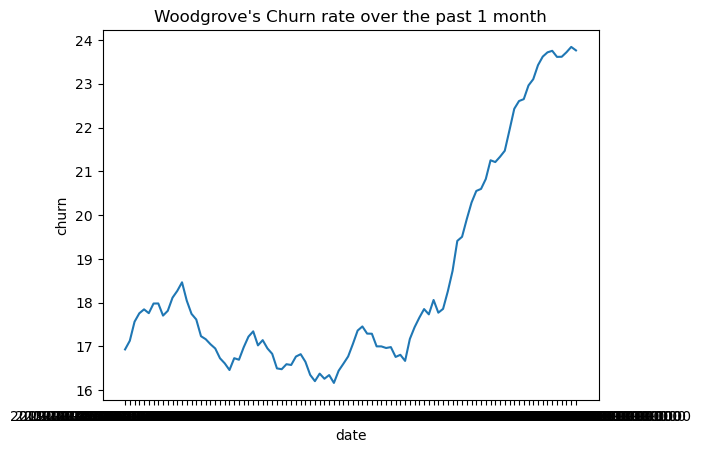

In [22]:
churn = sns.lineplot(data = churn_df_woodgrove, x=churn_df_woodgrove['date'], y=churn_df_woodgrove['churn'])
churn.set_title("Woodgrove's Churn rate over the past 1 month")

StatementMeta(, 2635c300-d706-49e2-8cd4-d232cce72816, 24, Finished, Available, Finished)

Text(0.5, 1.0, "Woodgrove's Sentiment Value rate over the past 1 month")

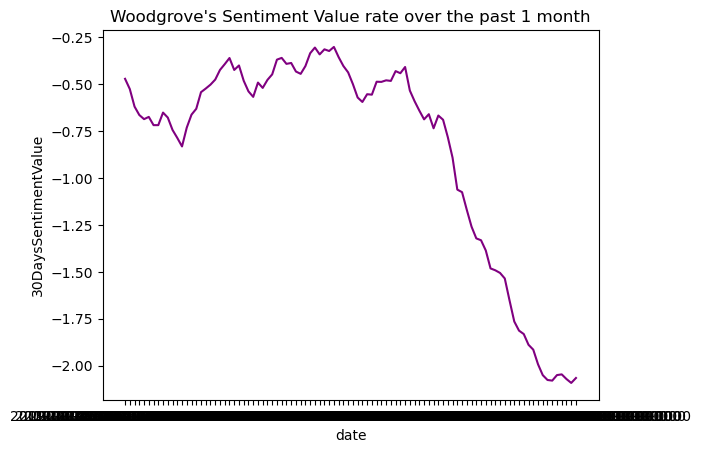

In [23]:
sentiment = sns.lineplot(data = churn_df_woodgrove, x=churn_df_woodgrove['date'], y=churn_df_woodgrove['30DaysSentimentValue'], color='purple')
sentiment.set_title("Woodgrove's Sentiment Value rate over the past 1 month")

In [ ]:
temp_df = churn_df_barclays[churn_df_barclays['30DaysSentimentValue'].isnull()]
temp_df

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 42, Finished, Available, Finished)

,date,30DaysSentimentValue,7DaysStockPrice,organisation
750,2019-12-01T00:00:00.000+0000,NaN,NaN,barclays
751,2019-12-02T00:00:00.000+0000,NaN,NaN,barclays
752,2019-12-03T00:00:00.000+0000,NaN,NaN,barclays
753,2019-12-04T00:00:00.000+0000,NaN,NaN,barclays
754,2019-12-05T00:00:00.000+0000,NaN,NaN,barclays
755,2019-12-06T00:00:00.000+0000,NaN,NaN,barclays
756,2019-12-07T00:00:00.000+0000,NaN,87.987451,barclays
757,2019-12-08T00:00:00.000+0000,NaN,88.117418,barclays
758,2019-12-09T00:00:00.000+0000,NaN,88.539811,barclays
759,2019-12-10T00:00:00.000+0000,NaN,88.799745,barclays


In [ ]:
churn_df_barclays.dropna(inplace=True)

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 82, Finished, Available, Finished)

In [ ]:
num_rows = len(churn_df_barclays.index)
num_rows

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 83, Finished, Available, Finished)

96

In [ ]:
def random_float(low, high):
    temp = random.random()*(high-low) + low
    return round(temp,2)

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 84, Finished, Available, Finished)

In [ ]:
from scipy.optimize import minimize
from scipy.stats import pearsonr
import random

# Ensure that the number of elements in 'x' matches the length of '30DaysSentimentValue'
num_rows = len(churn_df_barclays['30DaysSentimentValue'])

# Define the initial guess for x as a list with the same length as '30DaysSentimentValue'
x0 = [random.uniform(15, 24) for _ in range(num_rows)]

# Define bounds for each element in x
bounds = [(15, 24) for _ in range(num_rows)]

# Define the objective function
def objective_function(x):
    return abs(-1 - pearsonr(churn_df_barclays['30DaysSentimentValue'], x)[0])

# Perform the minimization
result = minimize(objective_function, x0=x0, method='SLSQP', bounds=bounds)

# Assign the result to the 'churn' column
churn_df_barclays['churn'] = result.x
churn_df_barclays['churn']
churn_df_barclays

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 85, Finished, Available, Finished)

,date,30DaysSentimentValue,7DaysStockPrice,organisation,churn
779,2019-12-30T00:00:00.000+0000,-0.471887,93.835952,barclays,17.068155
780,2019-12-31T00:00:00.000+0000,-0.526512,93.900935,barclays,17.262573
781,2020-01-01T00:00:00.000+0000,-0.619951,93.965919,barclays,17.701077
782,2020-01-02T00:00:00.000+0000,-0.664610,94.615753,barclays,17.887129
783,2020-01-03T00:00:00.000+0000,-0.686662,94.810703,barclays,17.985534
...,...,...,...,...,...
870,2020-03-30T00:00:00.000+0000,-2.050066,57.152853,barclays,23.760068
871,2020-03-31T00:00:00.000+0000,-2.046264,56.730461,barclays,23.756843
872,2020-04-01T00:00:00.000+0000,-2.071231,55.528270,barclays,23.885527
873,2020-04-02T00:00:00.000+0000,-2.091832,54.358569,barclays,23.994555


In [ ]:
churn_df_barclays['DateEXT'] = pd.to_datetime(churn_df_barclays['date'])
churn_df_barclays['DateDay'] = churn_df_barclays['DateEXT'].dt.day
churn_df_barclays['DateMonth'] = churn_df_barclays['DateEXT'].dt.month
churn_df_barclays['DateYear'] = churn_df_barclays['DateEXT'].dt.year


churn_df_barclays

StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 94, Finished, Available, Finished)

,date,30DaysSentimentValue,7DaysStockPrice,organisation,churn,DateEXT,DateDay,DateMonth,DateYear
779,2019-12-30T00:00:00.000+0000,-0.471887,93.835952,barclays,17.068155,2019-12-30 00:00:00+00:00,30,12,2019
780,2019-12-31T00:00:00.000+0000,-0.526512,93.900935,barclays,17.262573,2019-12-31 00:00:00+00:00,31,12,2019
781,2020-01-01T00:00:00.000+0000,-0.619951,93.965919,barclays,17.701077,2020-01-01 00:00:00+00:00,1,1,2020
782,2020-01-02T00:00:00.000+0000,-0.664610,94.615753,barclays,17.887129,2020-01-02 00:00:00+00:00,2,1,2020
783,2020-01-03T00:00:00.000+0000,-0.686662,94.810703,barclays,17.985534,2020-01-03 00:00:00+00:00,3,1,2020
...,...,...,...,...,...,...,...,...,...
870,2020-03-30T00:00:00.000+0000,-2.050066,57.152853,barclays,23.760068,2020-03-30 00:00:00+00:00,30,3,2020
871,2020-03-31T00:00:00.000+0000,-2.046264,56.730461,barclays,23.756843,2020-03-31 00:00:00+00:00,31,3,2020
872,2020-04-01T00:00:00.000+0000,-2.071231,55.528270,barclays,23.885527,2020-04-01 00:00:00+00:00,1,4,2020
873,2020-04-02T00:00:00.000+0000,-2.091832,54.358569,barclays,23.994555,2020-04-02 00:00:00+00:00,2,4,2020


In [ ]:
first_day_churn_df_barclays = churn_df_barclays[churn_df_barclays['DateDay'] == 1]
first_day_churn_df_barclays

In [ ]:
churn_df_barclays


StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 91, Finished, Available, Finished)

,date,30DaysSentimentValue,7DaysStockPrice,organisation,churn,DateEXT,DateDay
779,2019-12-30T00:00:00.000+0000,-0.471887,93.835952,barclays,17.068155,2019-12-30 00:00:00+00:00,30
780,2019-12-31T00:00:00.000+0000,-0.526512,93.900935,barclays,17.262573,2019-12-31 00:00:00+00:00,31
781,2020-01-01T00:00:00.000+0000,-0.619951,93.965919,barclays,17.701077,2020-01-01 00:00:00+00:00,1
782,2020-01-02T00:00:00.000+0000,-0.664610,94.615753,barclays,17.887129,2020-01-02 00:00:00+00:00,2
783,2020-01-03T00:00:00.000+0000,-0.686662,94.810703,barclays,17.985534,2020-01-03 00:00:00+00:00,3
...,...,...,...,...,...,...,...
870,2020-03-30T00:00:00.000+0000,-2.050066,57.152853,barclays,23.760068,2020-03-30 00:00:00+00:00,30
871,2020-03-31T00:00:00.000+0000,-2.046264,56.730461,barclays,23.756843,2020-03-31 00:00:00+00:00,31
872,2020-04-01T00:00:00.000+0000,-2.071231,55.528270,barclays,23.885527,2020-04-01 00:00:00+00:00,1
873,2020-04-02T00:00:00.000+0000,-2.091832,54.358569,barclays,23.994555,2020-04-02 00:00:00+00:00,2


StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 96, Finished, Available, Finished)

<Axes: xlabel='date', ylabel='churn'>

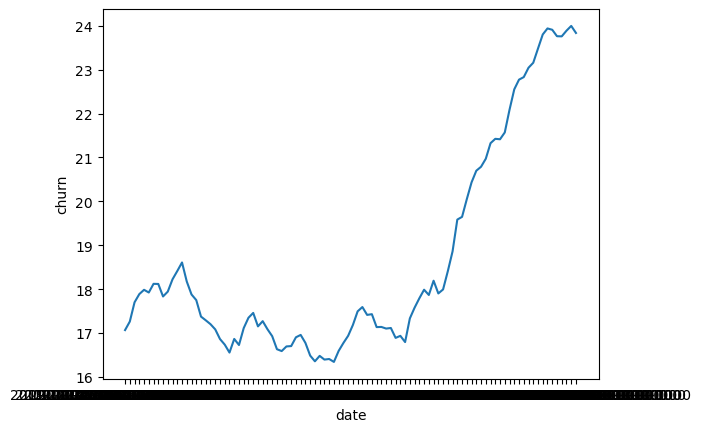

In [ ]:
sns.lineplot(data = churn_df_woodgrove, x=churn_df_woodgrove['date'], y=churn_df_woodgrove['churn'])
# IMPORTANT - CHANGE X AXIS TO BE READABLE (MONTH) 


StatementMeta(, e884a23d-1dca-463a-bab3-5e123dbb4305, 76, Finished, Available, Finished)

<Axes: xlabel='date', ylabel='30DaysSentimentValue'>

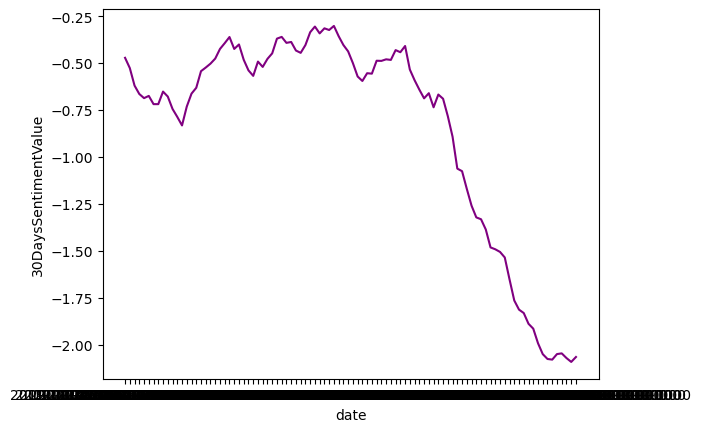

In [ ]:
sns.lineplot(data = churn_df_barclays, x=churn_df_barclays['date'], y=churn_df_barclays['30DaysSentimentValue'], color='purple')
